In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = mnist. load_data()

<function matplotlib.pyplot.show(close=None, block=None)>

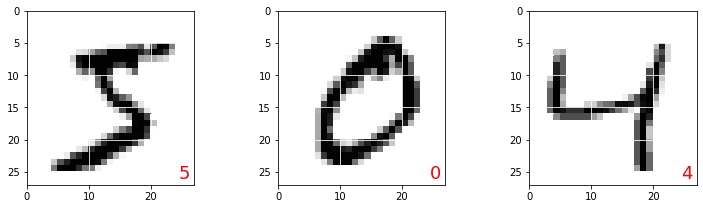

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
        plt.subplot(1, 3, id+1)
        img = x_train[id, :, :]
        plt.pcolor(255 - img)
        plt.text(24.5, 26, "%d" %y_train[id], color='red', fontsize = 18)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.grid('on',  color='white')
plt.show

In [4]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)
x_train = x_train.astype ('float32')
x_train = x_train/255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


In [5]:
np.random.seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [6]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f}sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 13us/sample - loss: 1.9817 - accuracy: 0.4615 - val_loss: 1.7034 - val_accuracy: 0.6287
Epoch 2/10
60000/60000 [==============================] - 0s 4us/sample - loss: 1.5339 - accuracy: 0.6816 - val_loss: 1.3670 - val_accuracy: 0.7321
Epoch 3/10
60000/60000 [==============================] - 0s 4us/sample - loss: 1.2539 - accuracy: 0.7695 - val_loss: 1.1297 - val_accuracy: 0.8144
Epoch 4/10
60000/60000 [==============================] - 0s 4us/sample - loss: 1.0497 - accuracy: 0.8237 - val_loss: 0.9556 - val_accuracy: 0.8408
Epoch 5/10
60000/60000 [==============================] - 0s 4us/sample - loss: 0.8988 - accuracy: 0.8447 - val_loss: 0.8269 - val_accuracy: 0.8567
Epoch 6/10
60000/60000 [==============================] - 0s 4us/sample - loss: 0.7862 - accuracy: 0.8586 - val_loss: 0.7303 - val_accuracy: 0.8672
Epoch 7/10
60000/60000 [==============================] - 0s 

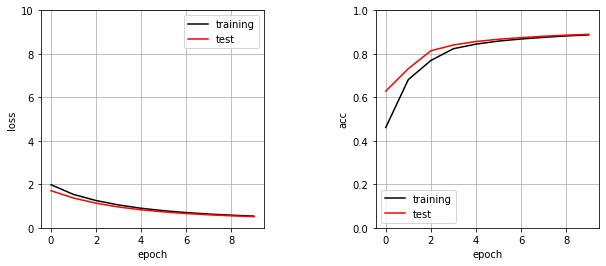

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='red')
plt.ylim(0,10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='red')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

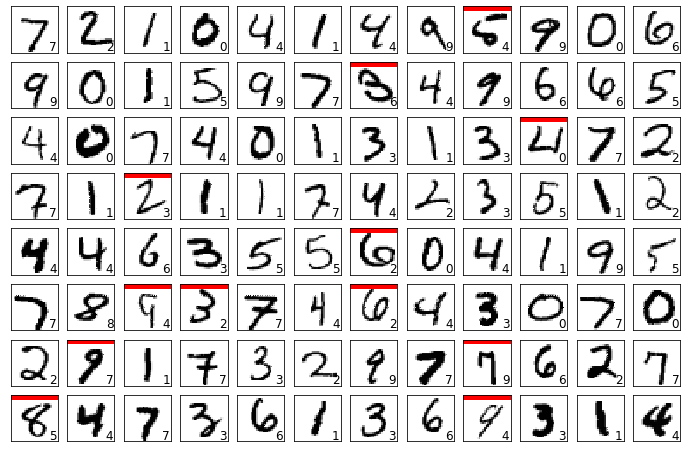

In [8]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i,:]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i,:]):
            plt.plot([0, 27], [1,1], color='red', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
        
show_prediction()
plt.show()

In [9]:
np.random.seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
#勾配法を洗練させたAdam(Adaptive moment estimationを用いる）
startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f}sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 12us/sample - loss: 1.4859 - accuracy: 0.5951 - val_loss: 0.8029 - val_accuracy: 0.8276
Epoch 2/10
60000/60000 [==============================] - 0s 4us/sample - loss: 0.6150 - accuracy: 0.8540 - val_loss: 0.4662 - val_accuracy: 0.8838
Epoch 3/10
60000/60000 [==============================] - 0s 4us/sample - loss: 0.4288 - accuracy: 0.8903 - val_loss: 0.3755 - val_accuracy: 0.8992
Epoch 4/10
60000/60000 [==============================] - 0s 4us/sample - loss: 0.3646 - accuracy: 0.9027 - val_loss: 0.3356 - val_accuracy: 0.9086
Epoch 5/10
60000/60000 [==============================] - 0s 4us/sample - loss: 0.3313 - accuracy: 0.9089 - val_loss: 0.3125 - val_accuracy: 0.9146
Epoch 6/10
60000/60000 [==============================] - 0s 4us/sample - loss: 0.3106 - accuracy: 0.9143 - val_loss: 0.2972 - val_accuracy: 0.9182
Epoch 7/10
60000/60000 [==============================] - 0s 

In [10]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [11]:
import numpy as np
from tensorflow.keras.datasets import mnist 
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist. load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype ('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test / 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

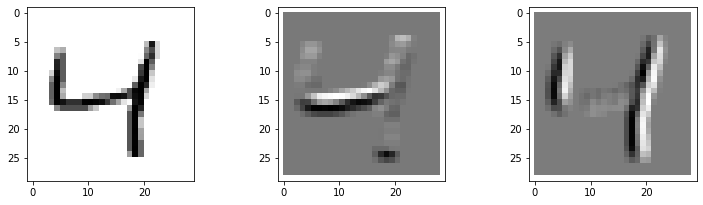

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1,1,1],
                                 [1,1,1],
                                 [-2,-2,-2]], dtype=float)
myfil2 = np.array([[-2,1,1],
                                [-2,1,1],
                                 [-2,1,1]], dtype=float)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih +3, iw:iw +3]
        out_img1[ih +1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih +1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))

plt.figure(1,figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1,3,3)
plt.pcolor(-out_img2)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.show()

In [13]:
import numpy as np
np.random.seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f}sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 26us/sample - loss: 1.0095 - accuracy: 0.7943 - val_loss: 0.3783 - val_accuracy: 0.8980
Epoch 2/20
60000/60000 [==============================] - 0s 8us/sample - loss: 0.3181 - accuracy: 0.9104 - val_loss: 0.2529 - val_accuracy: 0.9301
Epoch 3/20
60000/60000 [==============================] - 0s 8us/sample - loss: 0.2353 - accuracy: 0.9341 - val_loss: 0.2029 - val_accuracy: 0.9436
Epoch 4/20
60000/60000 [==============================] - 0s 8us/sample - loss: 0.1891 - accuracy: 0.9475 - val_loss: 0.1693 - val_accuracy: 0.9527
Epoch 5/20
60000/60000 [==============================] - 0s 8us/sample - loss: 0.1596 - accuracy: 0.9560 - val_loss: 0.1470 - val_accuracy: 0.9597
Epoch 6/20
60000/60000 [==============================] - 0s 8us/sample - loss: 0.1365 - accuracy: 0.9632 - val_loss: 0.1296 - val_accuracy: 0.9648
Epoch 7/20
60000/60000 [==============================] - 0s 

In [14]:
import numpy as np
np.random.seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3, 3), 
          input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.7028 - accuracy: 0.7914 - val_loss: 0.1244 - val_accuracy: 0.9625
Epoch 2/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1321 - accuracy: 0.9611 - val_loss: 0.0629 - val_accuracy: 0.9804
Epoch 3/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0858 - accuracy: 0.9744 - val_loss: 0.0449 - val_accuracy: 0.9860
Epoch 4/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0665 - accuracy: 0.9804 - val_loss: 0.0354 - val_accuracy: 0.9894
Epoch 5/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0559 - accuracy: 0.9829 - val_loss: 0.0301 - val_accuracy: 0.9895
Epoch 6/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0273 - val_accuracy: 0.9901
Epoch 7/20
60000/60000 [==============================] 

In [15]:
model_json_str = model.to_json()
open('mnist_mlp_model.json','w').write(model_json_str)
model.save_weights('mnist_mlp_weights.h5');

In [16]:
import numpy as np
np.random.seed(1)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import model_from_json
from keras.utils import np_utils
import matplotlib.pyplot as plt
# 保存したモデルを読み込む
model = model_from_json(open('mnist_mlp_model.json').read())
# 保存した学習結果を読み込む
model.load_weights('mnist_mlp_weights.h5')
model.summary();
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             